# Recipe Review Sentiment Analysis

This notebook analyzes user-generated recipe reviews to determine how review sentiment and structure impact user ratings. It uses Natural Language Processing (NLP) and classification models to predict whether a user gave a high rating based on their review.

## Objective
To build a classification model that predicts high or low ratings (binary target) using features derived from user reviews, such as sentiment scores, word counts, and TF-IDF vectors.

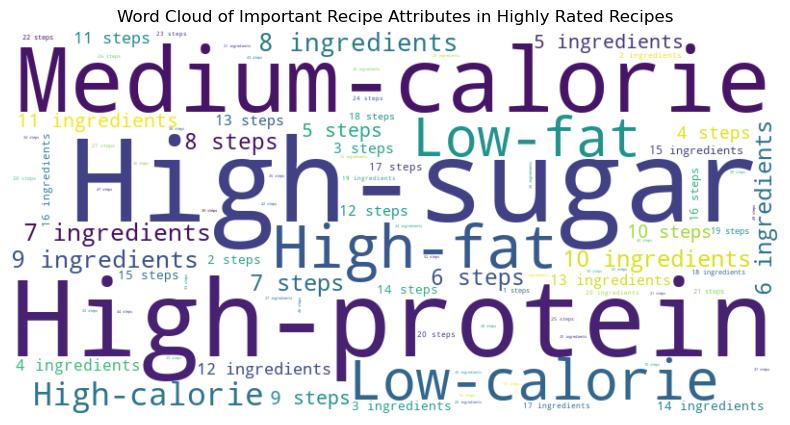

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.00      0.00     25729
           1       0.89      1.00      0.94    200745

    accuracy                           0.89    226474
   macro avg       0.59      0.50      0.47    226474
weighted avg       0.82      0.89      0.83    226474



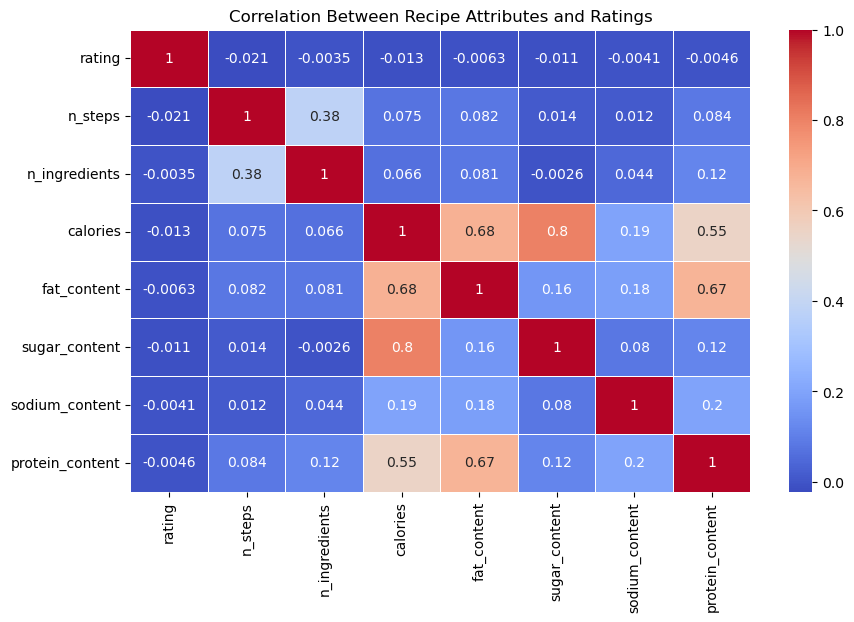

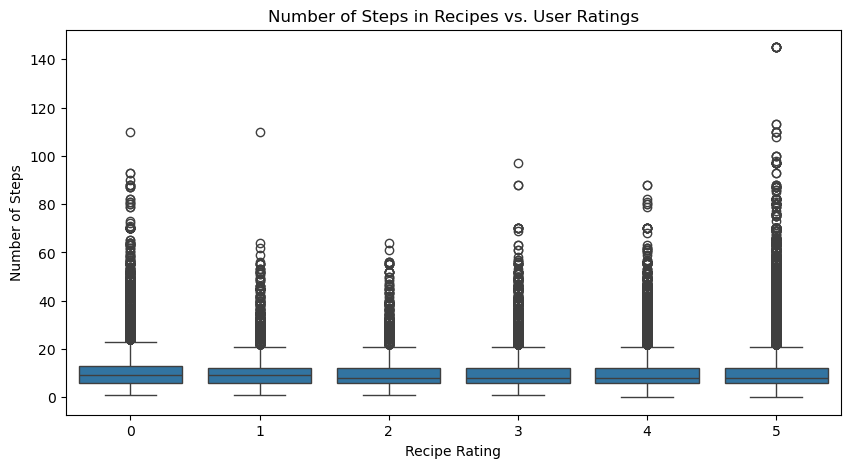

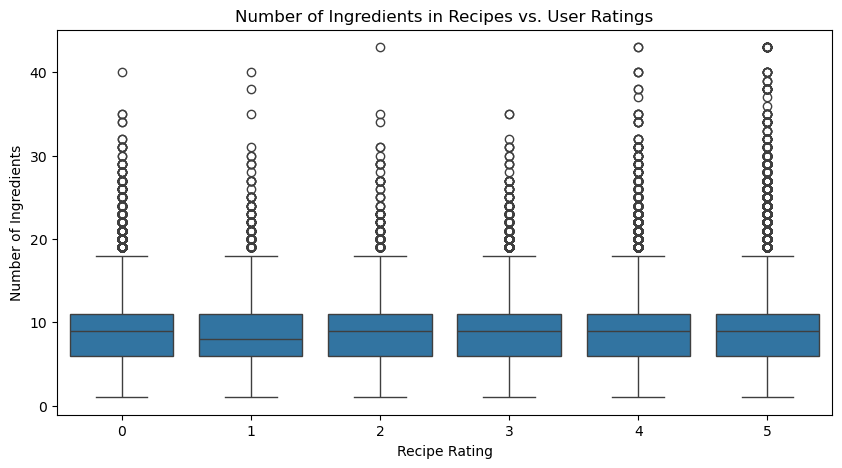

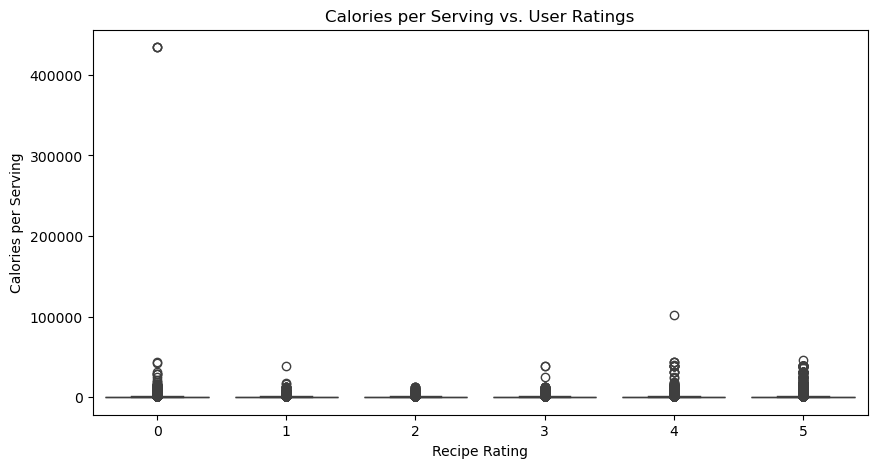

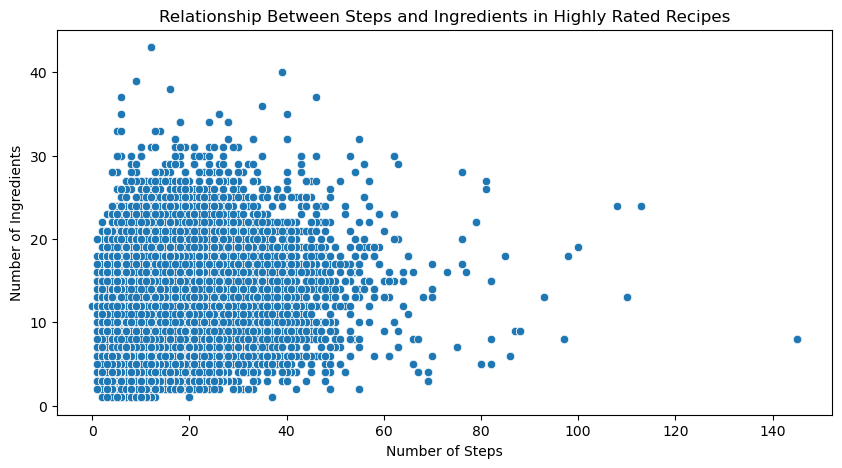

In [ ]:
!pip install nbconvert

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load datasets
df_recipes = pd.read_csv("RAW_recipes.csv")
df_interactions = pd.read_csv("RAW_interactions.csv")

# Merge datasets on 'recipe_id' (in interactions) and 'id' (in recipes)
df = pd.merge(df_interactions, df_recipes, left_on="recipe_id", right_on="id", how="left")

# Drop the duplicate 'id' column from recipes (since it's the same as 'recipe_id' now)
df.drop(columns=["id"], inplace=True)

# Extract relevant numerical features
df["rating"] = df["rating"].astype(int)  # Ensure rating is integer
df["n_steps"] = df["n_steps"].astype(float)
df["n_ingredients"] = df["n_ingredients"].astype(float)

# Convert 'nutrition' column from string format to list format
df["nutrition"] = df["nutrition"].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Create new nutritional feature columns
df["calories"] = df["nutrition"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else np.nan)
df["fat_content"] = df["nutrition"].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else np.nan)
df["sugar_content"] = df["nutrition"].apply(lambda x: x[2] if isinstance(x, list) and len(x) > 2 else np.nan)
df["sodium_content"] = df["nutrition"].apply(lambda x: x[3] if isinstance(x, list) and len(x) > 3 else np.nan)
df["protein_content"] = df["nutrition"].apply(lambda x: x[4] if isinstance(x, list) and len(x) > 4 else np.nan)

# Define binary classification target: High-rated (1) vs. Low-rated (0)
df["rating_category"] = (df["rating"] >= 4).astype(int)

# Select features for classification
features = ["n_steps", "n_ingredients", "calories", "fat_content", "sugar_content", "sodium_content", "protein_content"]
df = df.dropna(subset=features + ["rating_category"])  # Drop missing values

# Generate Word Cloud for Recipe Attributes
df_high_rated = df[df["rating_category"] == 1]  # Only high-rated recipes

# Convert numerical attributes to categorical text labels for better word cloud visualization
word_list = []

for _, row in df_high_rated.iterrows():
    word_list.append(f"{int(row['n_steps'])} steps")
    word_list.append(f"{int(row['n_ingredients'])} ingredients")

    if row["calories"] < 200:
        word_list.append("Low-calorie")
    elif row["calories"] > 600:
        word_list.append("High-calorie")
    else:
        word_list.append("Medium-calorie")

    if row["fat_content"] < 10:
        word_list.append("Low-fat")
    elif row["fat_content"] > 30:
        word_list.append("High-fat")

    if row["sugar_content"] > 15:
        word_list.append("High-sugar")

    if row["protein_content"] > 15:
        word_list.append("High-protein")

# Generate word frequency count
word_counts = Counter(word_list)

# Generate and display the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis", max_words=200)
wordcloud.generate_from_frequencies(word_counts)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Important Recipe Attributes in Highly Rated Recipes")
plt.show()

# Prepare train-test split
X = df[features]
y = df["rating_category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a simple classifier (Logistic Regression)
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute classification report (precision, recall, F1-score, support)
report = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(report)

# Correlation Analysis Between Attributes & Ratings
plt.figure(figsize=(10,6))
sns.heatmap(df[["rating", "n_steps", "n_ingredients", "calories", "fat_content", "sugar_content", "sodium_content", "protein_content"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Recipe Attributes and Ratings")
plt.show()

# Boxplot: Number of Steps vs. Ratings
plt.figure(figsize=(10,5))
sns.boxplot(x=df["rating"], y=df["n_steps"])
plt.xlabel("Recipe Rating")
plt.ylabel("Number of Steps")
plt.title("Number of Steps in Recipes vs. User Ratings")
plt.show()

# Boxplot: Number of Ingredients vs. Ratings
plt.figure(figsize=(10,5))
sns.boxplot(x=df["rating"], y=df["n_ingredients"])
plt.xlabel("Recipe Rating")
plt.ylabel("Number of Ingredients")
plt.title("Number of Ingredients in Recipes vs. User Ratings")
plt.show()

# Boxplot: Calories vs. Ratings
plt.figure(figsize=(10,5))
sns.boxplot(x=df["rating"], y=df["calories"])
plt.xlabel("Recipe Rating")
plt.ylabel("Calories per Serving")
plt.title("Calories per Serving vs. User Ratings")
plt.show()

# Relationship Between Steps & Ingredients in Highly Rated Recipes
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_high_rated["n_steps"], y=df_high_rated["n_ingredients"])
plt.xlabel("Number of Steps")
plt.ylabel("Number of Ingredients")
plt.title("Relationship Between Steps and Ingredients in Highly Rated Recipes")
plt.show()


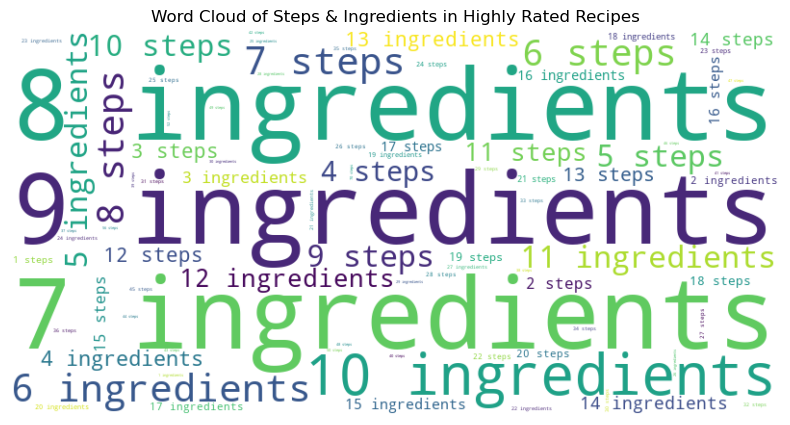

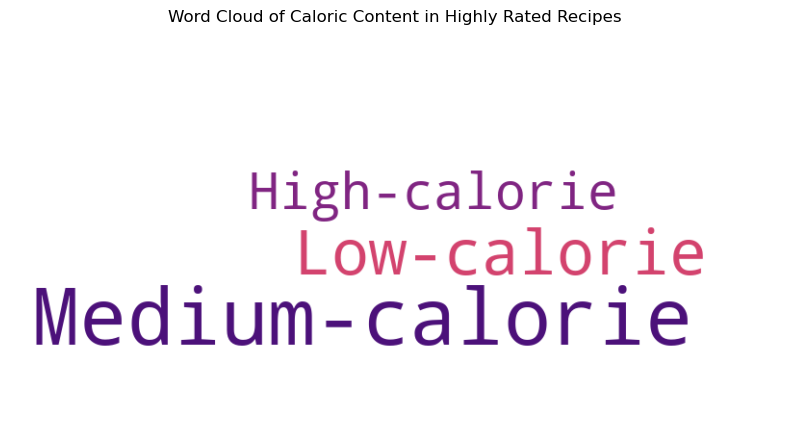

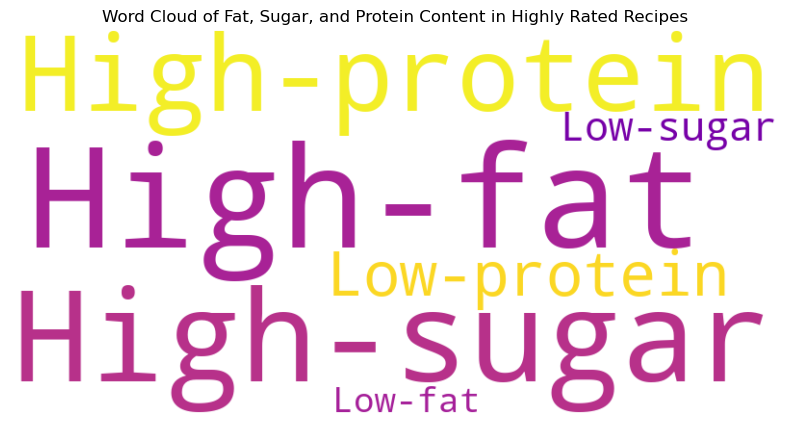

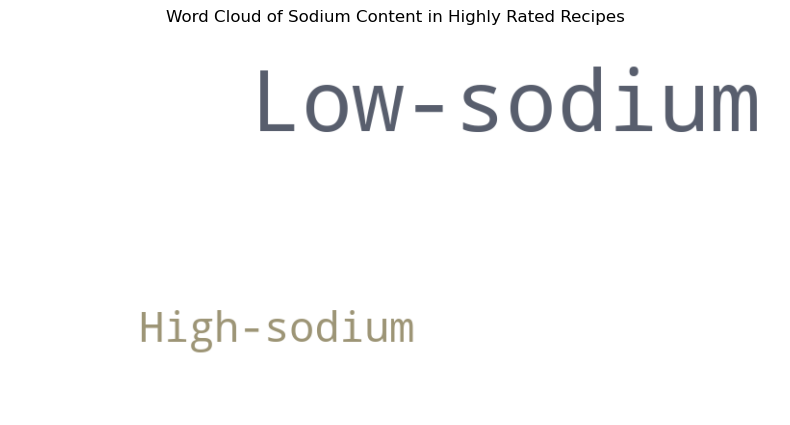

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load datasets
df_recipes = pd.read_csv("RAW_recipes.csv")
df_interactions = pd.read_csv("RAW_interactions.csv")

# Merge datasets on 'recipe_id' (in interactions) and 'id' (in recipes)
df = pd.merge(df_interactions, df_recipes, left_on="recipe_id", right_on="id", how="left")

# Drop duplicate 'id' column
df.drop(columns=["id"], inplace=True)

# Extract numerical features
df["rating"] = df["rating"].astype(int)
df["n_steps"] = df["n_steps"].astype(float)
df["n_ingredients"] = df["n_ingredients"].astype(float)

# Convert 'nutrition' column from string format to list format
df["nutrition"] = df["nutrition"].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Create new nutritional feature columns
df["calories"] = df["nutrition"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else np.nan)
df["fat_content"] = df["nutrition"].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else np.nan)
df["sugar_content"] = df["nutrition"].apply(lambda x: x[2] if isinstance(x, list) and len(x) > 2 else np.nan)
df["sodium_content"] = df["nutrition"].apply(lambda x: x[3] if isinstance(x, list) and len(x) > 3 else np.nan)
df["protein_content"] = df["nutrition"].apply(lambda x: x[4] if isinstance(x, list) and len(x) > 4 else np.nan)

# Define binary classification target: High-rated (1) vs. Low-rated (0)
df["rating_category"] = (df["rating"] >= 4).astype(int)

# Filter high-rated recipes for word clouds
df_high_rated = df[df["rating_category"] == 1]

### 1. Word Cloud for Steps & Ingredients ###
word_list_steps_ingredients = [
    f"{int(row['n_steps'])} steps" for _, row in df_high_rated.iterrows()
] + [
    f"{int(row['n_ingredients'])} ingredients" for _, row in df_high_rated.iterrows()
]

word_counts_steps_ingredients = Counter(word_list_steps_ingredients)
wordcloud_steps_ingredients = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate_from_frequencies(word_counts_steps_ingredients)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_steps_ingredients, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Steps & Ingredients in Highly Rated Recipes")
plt.show()

### 2. Word Cloud for Caloric Content ###
word_list_calories = [
    "Low-calorie" if row["calories"] < 200 else
    "High-calorie" if row["calories"] > 600 else
    "Medium-calorie"
    for _, row in df_high_rated.iterrows()
]

word_counts_calories = Counter(word_list_calories)
wordcloud_calories = WordCloud(width=800, height=400, background_color="white", colormap="magma").generate_from_frequencies(word_counts_calories)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_calories, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Caloric Content in Highly Rated Recipes")
plt.show()

### 3. Word Cloud for Fat, Sugar, and Protein Content ###
word_list_nutrition = [
    "Low-fat" if row["fat_content"] < 10 else "High-fat"
    for _, row in df_high_rated.iterrows()
] + [
    "High-sugar" if row["sugar_content"] > 15 else "Low-sugar"
    for _, row in df_high_rated.iterrows()
] + [
    "High-protein" if row["protein_content"] > 15 else "Low-protein"
    for _, row in df_high_rated.iterrows()
]

word_counts_nutrition = Counter(word_list_nutrition)
wordcloud_nutrition = WordCloud(width=800, height=400, background_color="white", colormap="plasma").generate_from_frequencies(word_counts_nutrition)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_nutrition, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Fat, Sugar, and Protein Content in Highly Rated Recipes")
plt.show()

### 4. Word Cloud for Sodium Content ###
word_list_sodium = [
    "Low-sodium" if row["sodium_content"] < 300 else "High-sodium"
    for _, row in df_high_rated.iterrows()
]

word_counts_sodium = Counter(word_list_sodium)
wordcloud_sodium = WordCloud(width=800, height=400, background_color="white", colormap="cividis").generate_from_frequencies(word_counts_sodium)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sodium, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Sodium Content in Highly Rated Recipes")
plt.show()


Updated Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.29      0.22     25729
           1       0.90      0.83      0.86    200745

    accuracy                           0.77    226474
   macro avg       0.54      0.56      0.54    226474
weighted avg       0.82      0.77      0.79    226474



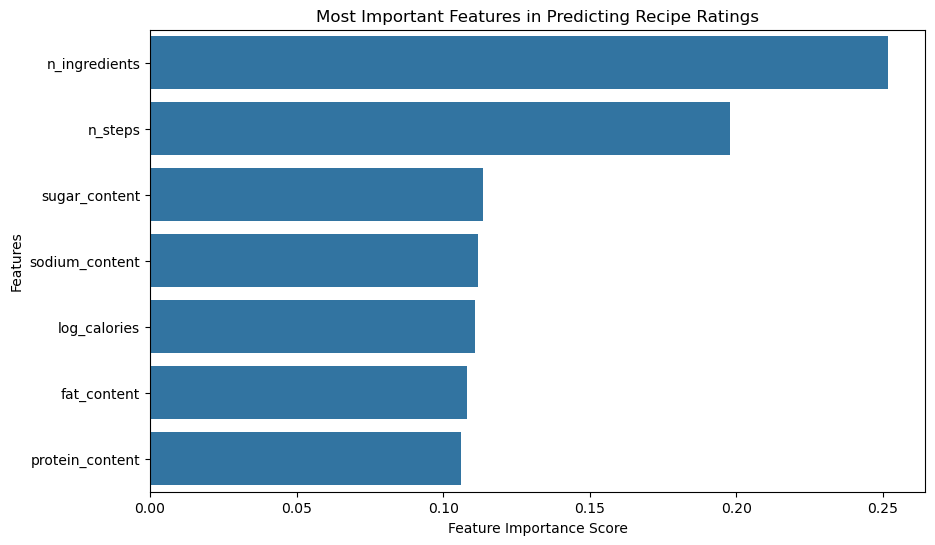

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Load datasets
df_recipes = pd.read_csv("RAW_recipes.csv")
df_interactions = pd.read_csv("RAW_interactions.csv")

# Merge datasets on 'recipe_id' (in interactions) and 'id' (in recipes)
df = pd.merge(df_interactions, df_recipes, left_on="recipe_id", right_on="id", how="left")

# Drop duplicate 'id' column
df.drop(columns=["id"], inplace=True)

# Extract numerical features
df["rating"] = df["rating"].astype(int)
df["n_steps"] = df["n_steps"].astype(float)
df["n_ingredients"] = df["n_ingredients"].astype(float)

# Convert 'nutrition' column from string format to list format
df["nutrition"] = df["nutrition"].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Create new nutritional feature columns
df["calories"] = df["nutrition"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else np.nan)
df["fat_content"] = df["nutrition"].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else np.nan)
df["sugar_content"] = df["nutrition"].apply(lambda x: x[2] if isinstance(x, list) and len(x) > 2 else np.nan)
df["sodium_content"] = df["nutrition"].apply(lambda x: x[3] if isinstance(x, list) and len(x) > 3 else np.nan)
df["protein_content"] = df["nutrition"].apply(lambda x: x[4] if isinstance(x, list) and len(x) > 4 else np.nan)

# Define binary classification target: High-rated (1) vs. Low-rated (0)
df["rating_category"] = (df["rating"] >= 4).astype(int)

# Select features for classification
df["log_calories"] = np.log1p(df["calories"])  # Apply log transformation
features = ["n_steps", "n_ingredients", "log_calories", "fat_content", "sugar_content", "sodium_content", "protein_content"]

# Drop NaN values
df = df.dropna(subset=features + ["rating_category"])

# Prepare train-test split
X = df[features]
y = df["rating_category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest Classifier with class weighting
clf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = clf.predict(X_test)

# Compute classification report
report = classification_report(y_test, y_pred)
print("Updated Classification Report:")
print(report)

# Feature Importance Plot
importances = clf.feature_importances_
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Most Important Features in Predicting Recipe Ratings")
plt.show()
